In [43]:
import numpy as np
import pandas as pd
import json
import joblib
from sklearn.preprocessing import StandardScaler
# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from pycaret.regression import *

In [44]:
# Change pandas options to show all columns
pd.set_option('display.max_columns', None)

In [45]:
data = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/data/listings.csv.gz') 

In [4]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [46]:
# I  will use only a few columns, so I will create a new df from the copy of df1, which will be my working df.
df = data[['beds','host_since', 'host_location','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','host_has_profile_pic','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms_text','price', 'availability_30', 'availability_60', 'availability_90','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month']]

### Preprocessing

In [6]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20231215032808,2023-12-15,city scrape,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,NaN,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Italy",I am a Turkish-Italian who was born in Istanbu...,within a few hours,90%,3%,f,https://a0.muscache.com/im/pictures/user/a22d7...,https://a0.muscache.com/im/pictures/user/a22d7...,Testaccio,7.0,7.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",VIII Appia Antica,NaN,41.871360,12.482150,Private room,Private room,1,NaN,1.5 baths,NaN,1.0,[],$50.00,7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,30,60,86,345,2023-12-15,5,0,0,2014-12-26,2015-05-08,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,f,6,0,6,0,0.05
1,3079,https://www.airbnb.com/rooms/3079,20231215032808,2023-12-16,previous scrape,Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...,NaN,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/miso/Hosting-...,3504,https://www.airbnb.com/users/show/3504,Laura,2008-10-08,"Rome, Italy",I've a degree in Art History\r\n,within a few hours,100%,0%,f,https://a0.muscache.com/im/users/3504/profile_...,https://a0.muscache.com/im/users/3504/profile_...,Monti,6.0,11.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",I Centro Storico,NaN,41.895000,12.491170,Entire rental unit,Entire home/apt,4,NaN,1 bath,NaN,1.0,[],$120.00,30,120,30,30,120,120,30.0,120.0,NaN,t,15,45,61,289,2023-12-16,21,0,0,2011-01-02,2022-04-30,4.53,4.38,4.62,4.71,4.86,4.81,4.43,NaN,f,6,6,0,0,0.13
2,11834,https://www.airbnb.com/rooms/11834,20231215032808,2023-12-15,city scrape,Rental unit in Rome · ★4.83 · 1 bedroom · 1 be...,NaN,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,https://www.airbnb.com/users/show/44552,Serena,2009-10-09,"Rome, Italy","Hello I'm Serena I was born and live in Rome, ...",within a few hours,100%,100%,t,https://a0.muscache.com/im/users/44552/profile...,https://a0.muscache.com/im/users/44552/profile...,Monti,1.0,2.0,"['email', 'phone']",t,t,"Rome, Lazio, Italy",I Centro Storico,NaN,41.895447,12.491181,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],$107.00,2,28,2,2,28,28,2.0,28.0,NaN,t,22,52,82,315,2023-12-15,220,48,0,2011-05-01,2023-11-12,4.83,4.83,4.91,4.98,4.95,4.99,4.77,NaN,f,1,1,0,0,1.43
3,75474,https://www.airbnb.com/rooms/75474,20231215032808,2023-12-15,city scrape,Villa in Rome · 9 bedrooms · 10 beds · 6.5 baths,NaN,"Bel Poggio is a green hill, with beautiful tre...",https://a0.muscache.com/pictures/miso/Hosting-...,400717,https://www.airbnb.com/users/show/400717,M

In [47]:
df.isnull().sum()

beds                       351
host_since                   9
host_location             6592
host_response_rate        4229
host_acceptance_rate      2810
host_is_superhost          194
host_listings_count          9
host_has_profile_pic         9
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              38
price                     1976
availability_30              0
availability_60              0
availability_90              0
number_of_reviews            0
review_scores_rating      4242
review_scores_location    4251
reviews_per_month         4271
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29357 entries, 0 to 29356
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   beds                    29006 non-null  float64
 1   host_since              29348 non-null  object 
 2   host_location           22765 non-null  object 
 3   host_response_rate      25128 non-null  object 
 4   host_acceptance_rate    26547 non-null  object 
 5   host_is_superhost       29163 non-null  object 
 6   host_listings_count     29348 non-null  float64
 7   host_has_profile_pic    29348 non-null  object 
 8   neighbourhood_cleansed  29357 non-null  object 
 9   property_type           29357 non-null  object 
 10  room_type               29357 non-null  object 
 11  accommodates            29357 non-null  int64  
 12  bathrooms_text          29319 non-null  object 
 13  price                   29357 non-null  object 
 14  availability_30         29357 non-null

In [48]:
df.head()

,beds,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,price,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month
0,1.00,2008-09-18,"Rome, Italy",90%,3%,f,7.00,t,VIII Appia Antica,Private room,Private room,1,1.5 baths,$50.00,30,60,86,5,4.80,4.40,0.05
1,1.00,2008-10-08,"Rome, Italy",100%,0%,f,6.00,t,I Centro Storico,Entire rental unit,Entire home/apt,4,1 bath,$120.00,15,45,61,21,4.53,4.81,0.13
2,1.00,2009-10-09,"Rome, Italy",100%,100%,t,1.00,t,I Centro Storico,Entire rental unit,Entire home/apt,2,1 bath,$107.00,22,52,82,220,4.83,4.99,1.43
3,10.00,2011-02-20,"London, United Kingdom",100%,100%,f,1.00,t,III Monte Sacro,Entire villa,Entire home/apt,14,6.5 baths,"$1,973.00",30,60,90,2,5.00,5.00,0.31
4,3.00,2009-03-30,"Rome, Italy",100%,92%,t,1.00,t,II Parioli/Nomentano,Entire rental unit,Entire home/apt,6,1 bath,$102.00,9,9,9,66,4.92,4.87,0.41


In [49]:
df.loc[:, 'price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '') # Elimina el símbolo $ y la coma.
df.loc[:,'price'] = df['price'].replace('', 'nan').astype(float) # Convierte a float y reemplaza los valores vacíos por NaN

In [50]:
# repair other columns before repairing nulls:
df.loc[:,'host_response_rate'] = df['host_response_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero
df.loc[:,'host_acceptance_rate'] = df['host_acceptance_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero
# Copy the text from 'bathrooms_text' into 'bathrooms'.
df['bathrooms'] = df['bathrooms_text']
df.loc[:,'bathrooms'] = df['bathrooms'].str.split().str[0]
df.loc[:,'bathrooms'] = df['bathrooms'].replace(['Half-bath', 'Shared', 'Private'], '0.5')
df.loc[:,'bathrooms'] = df['bathrooms'].astype(float)


C:\Users\kina5\AppData\Local\Temp\ipykernel_26844\1933906745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = df['bathrooms_text']


In [51]:
# First of all, I noticed that some of the nulls had [ ] instead of NaN. I'm going to change them to NaN

df = df.replace('[]',np.NaN)

In [52]:
df.drop(columns='bathrooms_text', inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29357 entries, 0 to 29356
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   beds                    29006 non-null  float64
 1   host_since              29348 non-null  object 
 2   host_location           22765 non-null  object 
 3   host_response_rate      25128 non-null  object 
 4   host_acceptance_rate    26547 non-null  object 
 5   host_is_superhost       29163 non-null  object 
 6   host_listings_count     29348 non-null  float64
 7   host_has_profile_pic    29348 non-null  object 
 8   neighbourhood_cleansed  29357 non-null  object 
 9   property_type           29357 non-null  object 
 10  room_type               29357 non-null  object 
 11  accommodates            29357 non-null  int64  
 12  price                   27381 non-null  object 
 13  availability_30         29357 non-null  int64  
 14  availability_60         29357 non-null

In [54]:
# In this case, as they are real numbers, we fill in with the average.
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
df['price'] = df['price'].fillna(df['price'].mean()) 
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

# In this case, being integers, we fill with the median and change to int.
df['host_listings_count'] = df['host_listings_count'].fillna(df['host_listings_count'].median()).astype(int)
df['beds'] = df['beds'].fillna(df['beds'].median()).astype(int)

C:\Users\kina5\AppData\Local\Temp\ipykernel_26844\2820172740.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
C:\Users\kina5\AppData\Local\Temp\ipykernel_26844\2820172740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
C:\Users\kina5\AppData\Local\Temp\ipykernel_26844\2820172740.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a f

- Outliers treatment

In [55]:
# Configures the display of numbers in decimal notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# I select the variables I am interested in
var = df[['bathrooms','beds','accommodates','price']]
# Apply the describe() function only to numeric columns
var.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,29357.00,1.30,0.69,0.00,1.00,1.00,1.00,12.50
beds,29357.00,2.22,1.53,1.00,1.00,2.00,3.00,38.00
accommodates,29357.00,3.70,2.05,1.00,2.00,4.00,4.00,16.00
price,29357.00,172.38,687.91,8.00,79.00,110.00,172.38,80000.00


In [57]:
# DISPLAY OUTLIERS USING INTERQUARTILE RANGES

# Function to see the number of outliers in our dataset according to the interquartile ranges.
def outliers (df):
    for columnas in df:
        if df[columnas].dtype in ['int64', 'float64']:  

            Q1 = df[columnas].quantile(0.25)
            Q3 = df[columnas].quantile(0.75)
            IQR = Q3 - Q1
            outlierIzq = Q1-(1.5*IQR)
            outlierDer = Q3+(1.5*IQR)
            outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
            print("Variable " + columnas + " has " + str(len(outliers)) + "outliers")

    
outliers(var)

La variable bathrooms tiene 7324 valores outliers
La variable accommodates tiene 1462 valores outliers
La variable price tiene 1915 valores outliers


In [58]:
# REPAIR OUTLIERS USING INTERQUARTILE RANGES
def reparar_atipicos(df, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
    
    for indice in range(len(df[col.name])): 
        if indice in df.index:  
            elemento = df.loc[indice, col.name] 
            if elemento > atipico_sup: 
                df.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf: 
                df.loc[indice, col.name] = atipico_inf
            
    return df  

#repair the outliers of the variable Price
reparar_atipicos(df, df['price'])

,beds,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,price,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,bathrooms
0,1,2008-09-18,"Rome, Italy",90.00,3.00,f,7,t,VIII Appia Antica,Private room,Private room,1,50.00,30,60,86,5,4.80,4.40,0.05,1.50
1,1,2008-10-08,"Rome, Italy",100.00,0.00,f,6,t,I Centro Storico,Entire rental unit,Entire home/apt,4,120.00,15,45,61,21,4.53,4.81,0.13,1.00
2,1,2009-10-09,"Rome, Italy",100.00,100.00,t,1,t,I Centro Storico,Entire rental unit,Entire home/apt,2,107.00,22,52,82,220,4.83,4.99,1.43,1.00
3,10,2011-02-20,"London, United Kingdom",100.00,100.00,f,1,t,III Monte Sacro,Entire villa,Entire home/apt,14,312.45,30,60,90,2,5.00,5.00,0.31,6.50
4,3,2009-03-30,"Rome, Italy",100.00,92.00,t,1,t,II Parioli/Nomentano,Entire rental unit,Entire home/apt,6,102.00,9,9,9,66,4.92,4.87,0.41,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29352,1,2023-02-08,"Rome, Italy",100.00,100.00,f,1,t,I Centro Storico,Entire rental unit,Entire home/apt,2,60.00,30,60,90,0,4.72,4.73,1.72,1.00
29353,1,2013-11-09,"Rome, Italy",94.83,89.04,f,3,t,I Centro Storico,Entire rental unit,Entire home/apt,3,68.00,21,51,81,0,4.72,4.73,1.72,1.00
29354,1,2023-07-31,"Rome, Italy",100.00,46.00,f,2,t,VIII Appia Antica,Private room in rental unit,Private room,2,50.00,0,0,7,0,4.72,4.73,1.72,1.00
29355,2,2018-07-31,"Rome, Italy",93.00,96.00,f,65,t,I Centro Storico,Entire rental unit,Entire home/apt,4,312.45,0,0,0,0,4.72,4.73,1.72,1.00


In [59]:
# change the bathrooms to int so I don't get errors in the app.
df['bathrooms'] = df['bathrooms'].astype(int)
df['bathrooms'].unique()

array([ 1,  6,  2,  4,  3,  5,  0, 12,  9,  7,  8, 10])

In [60]:
#Save clean df to csv
# df.to_csv('data/data_price_predictor.csv', index=False)

In [62]:
# Analysis of variables highly correlated with price (target var.)
threshold = 0.30
corr[(corr>threshold)|(corr<-threshold)]

,beds,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,price,availability_30,availability_60,availability_90,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,bathrooms
beds,1.00,NaN,NaN,NaN,0.79,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47
host_response_rate,NaN,1.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,0.34,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.79,NaN,NaN,NaN,1.00,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
price,0.35,NaN,NaN,NaN,0.42,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38
availability_30,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.95,0.92,NaN,NaN,NaN,NaN,NaN
availability_60,NaN,NaN,NaN,NaN,NaN,NaN,0.95,1.00,0.98,NaN,NaN,NaN,NaN,NaN
availability_90,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.98,1.00,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.40,NaN


In [63]:
#create a df with the variables that have a high correlation with the target variable (price). I have also included the neighbourhood because I want to train the model with that variable.
df_filtrado = df[['beds','accommodates',
		 'bathrooms',
		 'neighbourhood_cleansed','price']]

In [64]:
#Save filtered df to csv
# df_filtrado.to_csv('data/data_price_predictor_filtrado.csv', index=False)

In [65]:
#label encoder
etiquetas = ['VIII Appia Antica', 'I Centro Storico', 'III Monte Sacro', 'II Parioli/Nomentano', 'VII San Giovanni/Cinecittà', 'XIII Aurelia', 'V Prenestino/Centocelle', 'XII Monte Verde', 'IV Tiburtina', 'XV Cassia/Flaminia', 'VI Roma delle Torri', 'X Ostia/Acilia', 'XIV Monte Mario', 'IX Eur', 'XI Arvalia/Portuense']

# Create a encoder dictionary
mapeo = {barrio: indice for indice, barrio in enumerate(etiquetas)} # save json

# Replace the neighbourhoods with numbers using the encoder dictionary
df_filtrado.loc[:,'neighbourhood_cleansed'] = df_filtrado['neighbourhood_cleansed'].replace(mapeo)

C:\Users\kina5\AppData\Local\Temp\ipykernel_26844\1131442725.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtrado.loc[:,'neighbourhood_cleansed'] = df_filtrado['neighbourhood_cleansed'].replace(mapeo)


,beds,accommodates,bathrooms,neighbourhood_cleansed,price
0,1,1,1,0,50.00
1,1,4,1,1,120.00
2,1,2,1,1,107.00
3,10,14,6,2,312.45
4,3,6,1,3,102.00


In [66]:
#save json of the encoder for use in the app

file_path = 'mapeo.json'

# save encoder file
with open(file_path, 'w') as file:
    json.dump(mapeo, file)

### Regression modelling and model evaluation

- Data split

In [67]:
df_filtrado

,beds,accommodates,bathrooms,neighbourhood_cleansed,price
0,1,1,1,0,50.00
1,1,4,1,1,120.00
2,1,2,1,1,107.00
3,10,14,6,2,312.45
4,3,6,1,3,102.00
...,...,...,...,...,...
29352,1,2,1,1,60.00
29353,1,3,1,1,68.00
29354,1,2,1,0,50.00
29355,2,4,1,1,312.45


In [68]:
# assign the independent variables and the dependent variable. Our target variable is price
X = df_filtrado.drop(['price'], axis=1)
y = df_filtrado['price']

In [70]:
# split the data into training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=357) 

In [71]:
# Normalisation

#Initialising the scaler
scaler = StandardScaler()
 
#normalise the training variables
X_train_scaled = scaler.fit_transform(X_train)
 
#apply the same normalisation to the test.
X_test_scaled = scaler.transform(X_test)

In [72]:
#save scaler 

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Train regression models:

- ElasticNet

In [73]:
#Initialise model and parameters
alpha = 0.1 
l1_ratio = 0.1 
#instance the model
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#train model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse_ElasticNet = mse(y_test, y_pred) 
mse_ElasticNet**.5

61.56427900955719

- Stochastic Gradient Descent

In [74]:
#Initialise model and parameters
penalty = 'elasticnet' 
alpha = .1 
l1_ratio = .1 
#instance the model
model = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#train model
model.fit(X_train_scaled, y_train)
mse_SGDRegressor = mse(y_test,model.predict(X_test_scaled))
print(mse_SGDRegressor**.5)

61.52650296740878


- Support Vector Regression

In [75]:
#Initialise model and parameters
C = 1 
kernel = 'rbf'
#instance the model
model = svm.SVR(C = C, kernel = kernel)
#train model
model.fit(X_train_scaled, y_train)
mse_SVR = mse(y_test,model.predict(X_test_scaled))
print(mse_SVR**0.5)

62.473828804855


- Random Forest

In [76]:
#Initialise model and parameters
n_estimators = 200 
criterion = 'squared_error' 
max_depth = None 
min_samples_split = 2 
verbose = 1 
#instance the model
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#train model
model.fit(X_train_scaled, y_train)
mse_RF = mse(y_test,model.predict(X_test_scaled))
print(mse_RF**.5)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


60.91725189389325


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


- Boosting: *Gradient Descent*

In [77]:
#Initialise model and parameters
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
#convert the data to DMatrix format.
train_data = xgb.DMatrix(X_train_scaled, label=y_train)
test_data = xgb.DMatrix(X_test_scaled, label=y_test)
##instance the model and train model
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB**0.5)

60.239559951927504


Compare models:

Text(0.5, 0, 'Modelo')

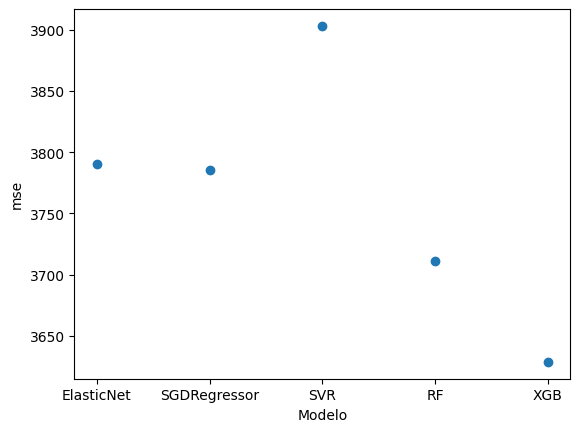

In [78]:
mse = [mse_ElasticNet, mse_SGDRegressor, mse_SVR, mse_RF, mse_XGB]
plt.scatter(['ElasticNet', 'SGDRegressor', 'SVR', 'RF', 'XGB'], mse)
plt.ylabel('mse')
plt.xlabel('Model')

In [79]:
mapeo_inverso = {indice: barrio for barrio, indice in mapeo.items()}
df_filtrado.loc[:,'neighbourhood_cleansed'] = df_filtrado['neighbourhood_cleansed'].replace(mapeo_inverso)

In [80]:
#save decoder json for use in the app

file_path = 'mapeo_inverso.json'

# save decoder file as a json file
with open(file_path, 'w') as file:
    json.dump(mapeo_inverso, file)

In [81]:
#save best model
joblib.dump(model, 'models/price_xbg.pkl') 

['models/price_xbg.pkl']

---
#### Fast Machine Learning (Pycaret)

In [59]:
#setup: taget> price
setup = setup(data = df_filtrado, target = 'price', session_id = 357)	

,Description,Value
0,Session id,357
1,Target,price
2,Target type,Regression
3,Original data shape,"(29357, 5)"
4,Transformed data shape,"(29357, 5)"
5,Transformed train set shape,"(20549, 5)"
6,Transformed test set shape,"(8808, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [60]:
# compare models and choose the best
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:18:49
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,45.9070,3630.3330,60.2261,0.3161,0.4623,0.4411,0.2950
gbr,Gradient Boosting Regressor,46.0352,3632.4954,60.2405,0.3157,0.4633,0.4439,0.3260
xgboost,Extreme Gradient Boosting,46.1953,3721.3309,60.9771,0.2989,0.4667,0.4420,0.0950
rf,Random Forest Regressor,46.4724,3761.1667,61.3039,0.2914,0.4693,0.4451,0.5180
et,Extra Trees Regressor,46.6468,3819.2950,61.7763,0.2805,0.4726,0.4459,0.4060
lr,Linear Regression,47.5883,3842.8617,61.9665,0.2760,0.4771,0.4634,1.5060
ridge,Ridge Regression,47.5884,3842.8611,61.9665,0.2760,0.4771,0.4634,0.0210
lar,Least Angle Regression,47.5883,3842.8617,61.9665,0.2760,0.4771,0.4634,0.0190
br,Bayesian Ridge,47.5903,3842.8587,61.9665,0.2760,0.4771,0.4635,0.0190
llar,Lasso Least Angle Regression,47.6792,3845.5594,61.9899,0.2755,0.4775,0.4649,0.0190


In [54]:
#choose lightgbm. Create variable with the chosen model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46.9063,3851.6294,62.0615,0.2817,0.4704,0.4443
1,46.1360,3568.0112,59.7328,0.3382,0.4694,0.4570
2,48.4429,4016.7121,63.3775,0.2790,0.4817,0.4664
3,44.9696,3410.9517,58.4034,0.3295,0.4597,0.4431
4,44.2846,3490.0073,59.0763,0.3220,0.4557,0.4300
5,44.3790,3424.7082,58.5210,0.3497,0.4459,0.4180
6,46.1430,3698.5855,60.8160,0.3029,0.4541,0.4256
7,47.2233,3902.6929,62.4715,0.2807,0.4667,0.4399
8,45.7543,3570.1430,59.7507,0.3304,0.4623,0.4437


In [57]:
#improve their hyperparameters automatically and see how the MSE drops considerably.
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46.9750,3850.2614,62.0505,0.2820,0.4712,0.4450
1,46.2955,3580.6048,59.8382,0.3358,0.4708,0.4602
2,48.3472,4011.7683,63.3385,0.2799,0.4831,0.4680
3,45.1812,3411.5962,58.4089,0.3294,0.4606,0.4460
4,44.3468,3483.2092,59.0187,0.3234,0.4574,0.4323
5,44.3758,3406.6293,58.3663,0.3531,0.4461,0.4190
6,46.3218,3704.2165,60.8623,0.3018,0.4541,0.4268
7,47.4129,3918.8894,62.6010,0.2777,0.4690,0.4430
8,45.8488,3570.6299,59.7547,0.3303,0.4647,0.4474


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


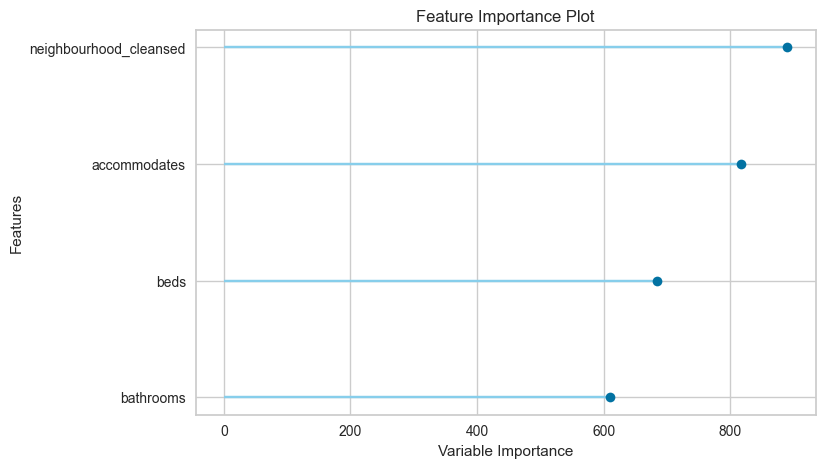

In [58]:
#see the importance of the variables
plot_model(tuned_lightgbm, plot = 'feature')

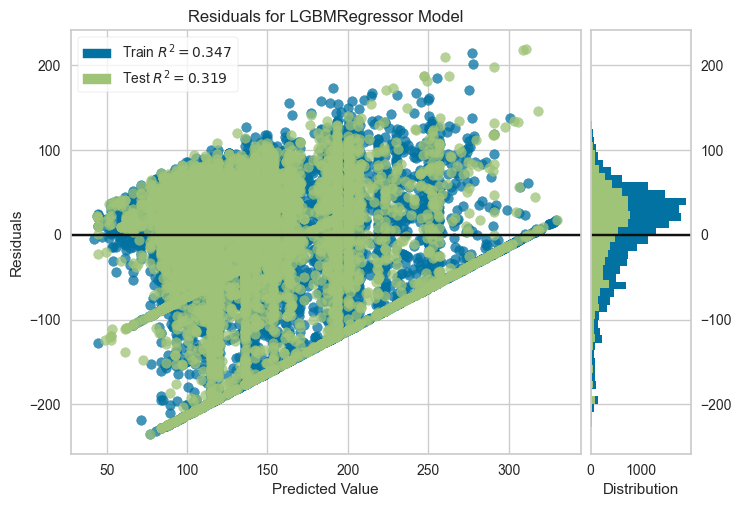

In [59]:
#see the residuals
plot_model(tuned_lightgbm, plot = 'residuals')

In [60]:
#finalise the model with the hyperparameters
final_lightgbm = finalize_model(tuned_lightgbm)

In [61]:
#save pycaret model
save_model(final_lightgbm, 'models/lightgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['beds', 'accommodates',
                                              'bathrooms',
                                              'neighbourhood_cleansed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=357))]),
 'lightgbm_model.pkl')